In [1]:
# ===== LIMPIAR (si ya existe el repo) =====
!rm -rf /content/Ferreyra_Tomas_tp_dt

# ===== CLONAR TU REPO =====
!git clone https://github.com/tferreyragthb/Ferreyra_Tomas_tp_dt.git

print("\nContenido del repo clonado:")
!ls /content/Ferreyra_Tomas_tp_dt


Cloning into 'Ferreyra_Tomas_tp_dt'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 164 (delta 35), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (164/164), 274.16 KiB | 7.03 MiB/s, done.
Resolving deltas: 100% (35/35), done.

Contenido del repo clonado:
notebooks  src


In [2]:
import sys

sys.path.append("/content/Ferreyra_Tomas_tp_dt")

# Crear __init__.py para que Python detecte paquetes
!touch /content/Ferreyra_Tomas_tp_dt/src/__init__.py
!touch /content/Ferreyra_Tomas_tp_dt/src/data/__init__.py
!touch /content/Ferreyra_Tomas_tp_dt/src/models/__init__.py
!touch /content/Ferreyra_Tomas_tp_dt/src/training/__init__.py
!touch /content/Ferreyra_Tomas_tp_dt/src/evaluation/__init__.py

print("PYTHONPATH configurado ✓")


touch: cannot touch '/content/Ferreyra_Tomas_tp_dt/src/evaluation/__init__.py': No such file or directory
PYTHONPATH configurado ✓


In [3]:
# Crear carpetas
!mkdir -p /content/Ferreyra_Tomas_tp_dt/data/train
!mkdir -p /content/Ferreyra_Tomas_tp_dt/data/test_users
!mkdir -p /content/Ferreyra_Tomas_tp_dt/data/groups

# Descargar train
!wget -q -O /content/Ferreyra_Tomas_tp_dt/data/train/netflix8_train.df \
 https://raw.githubusercontent.com/DiploDatos/AprendizajePorRefuerzos/master/tp_decision_transformer/data/train/netflix8_train.df

# Descargar test users
!wget -q -O /content/Ferreyra_Tomas_tp_dt/data/test_users/netflix8_test.json \
 https://raw.githubusercontent.com/DiploDatos/AprendizajePorRefuerzos/master/tp_decision_transformer/data/test_users/netflix8_test.json

# Descargar centroides
!wget -q -O /content/Ferreyra_Tomas_tp_dt/data/groups/mu_netflix8.csv \
 https://raw.githubusercontent.com/DiploDatos/AprendizajePorRefuerzos/master/tp_decision_transformer/data/groups/mu_netflix8.csv

print("✓ Data descargada en tu repo local")


✓ Data descargada en tu repo local


In [4]:
%cd /content/Ferreyra_Tomas_tp_dt

from src.data.load_data import load_train, load_test, load_group_centroids

df_train = load_train("netflix")
test_users = load_test("netflix")
mu = load_group_centroids("netflix")

print(df_train.head())
print(len(test_users))
print(mu.shape)


/content/Ferreyra_Tomas_tp_dt
   user_id  user_group                                              items  \
0        0           0  [472, 97, 122, 654, 709, 467, 574, 544, 478, 3...   
1        1           0  [431, 445, 367, 100, 743, 739, 263, 426, 321, ...   
2        2           0  [224, 133, 227, 51, 230, 546, 57, 60, 743, 495...   
3        3           0  [338, 80, 210, 618, 468, 320, 351, 411, 575, 2...   
4        4           0  [510, 231, 708, 86, 514, 352, 233, 351, 415, 6...   

                                             ratings  
0  [4.0, 3.0, 4.0, 3.0, 5.0, 4.0, 2.0, 1.0, 4.0, ...  
1  [3.0, 5.0, 5.0, 5.0, 5.0, 3.0, 1.0, 4.0, 5.0, ...  
2  [5.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 5.0, 5.0, ...  
3  [3.0, 5.0, 3.0, 5.0, 2.0, 1.0, 4.0, 3.0, 3.0, ...  
4  [4.0, 2.0, 3.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, ...  
1600
(8, 752)


In [5]:
from src.data.preprocessing import normalize_item_ids
from src.data.data_preprocessing import create_dt_dataset

# 1) Normalizar los IDs de items
mapping, NUM_ITEMS = normalize_item_ids(df_train)
print("Items únicos reindexados:", NUM_ITEMS)

# 2) Crear trayectorias para Decision Transformer
trajectories = create_dt_dataset(df_train)

print("Total de trayectorias:", len(trajectories))
print("Keys:", trajectories[0].keys())


Items únicos reindexados: 752
Total de trayectorias: 16000
Keys: dict_keys(['items', 'ratings', 'returns_to_go', 'timesteps', 'user_group'])


In [6]:
print(type(trajectories))
print(type(trajectories[0]))
print(trajectories[0])


<class 'list'>
<class 'dict'>
{'items': array([472,  97, 122, 654, 709, 467, 574, 544, 478, 338, 301, 185, 156,
       712, 525, 225, 396, 370, 589, 750, 586, 353, 416, 687, 465, 433,
       215, 438, 219, 528, 134, 444,  92,  24, 145, 572,  22, 454, 715,
       364,  19, 115, 386, 374, 203, 229,  44, 624, 303, 152, 206, 268,
       329, 692,   8,  12, 291, 633, 537, 457, 121, 689, 164, 114, 566,
       519, 234, 154, 104,  74,  49,  86, 419, 315, 387, 663, 400]), 'ratings': array([4., 3., 4., 3., 5., 4., 2., 1., 4., 5., 5., 3., 4., 4., 4., 2., 5.,
       5., 5., 4., 4., 3., 4., 5., 1., 1., 5., 4., 4., 4., 4., 4., 4., 5.,
       2., 4., 5., 3., 4., 3., 2., 1., 5., 3., 4., 4., 3., 5., 4., 5., 4.,
       5., 4., 3., 4., 4., 5., 5., 3., 2., 4., 5., 5., 5., 2., 5., 5., 2.,
       4., 5., 4., 5., 4., 5., 4., 3., 5.], dtype=float32), 'returns_to_go': array([296., 292., 289., 285., 282., 277., 273., 271., 270., 266., 261.,
       256., 253., 249., 245., 241., 239., 234., 229., 224., 220., 216

In [7]:
from src.data.dataset import SequenceDataset

# trajectories viene del preprocesamiento
states = [t["items"] for t in trajectories]
actions = [t["ratings"] for t in trajectories]
returns_to_go = [t["returns_to_go"] for t in trajectories]

dataset = SequenceDataset(
    states=states,
    actions=actions,
    returns_to_go=returns_to_go,
    seq_len=50
)

len(dataset)


16000

In [8]:
from src.models.decision_transformer import DecisionTransformer

model = DecisionTransformer(
    state_dim=NUM_ITEMS,
    action_dim=NUM_ITEMS,
    hidden_dim=128
)


In [9]:
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=True
)


In [10]:
batch = next(iter(dataloader))

states, actions, rtg = batch

print("states:", states.shape)
print("actions:", actions.shape)
print("rtg:", rtg.shape)


states: torch.Size([4, 50])
actions: torch.Size([4, 50])
rtg: torch.Size([4, 50, 1])


In [11]:
import torch
from src.training.trainer import Trainer

# ============================
# Selección automática de device
# ============================
device = "cuda" if torch.cuda.is_available() else "cpu"

print("🔧 Dispositivo disponible:", device)
if device == "cuda":
    print("GPU detectada:", torch.cuda.get_device_name(0))

# ============================
# Mover el modelo al dispositivo
# ============================
model.to(device)

# ============================
# Entrenador
# ============================
trainer = Trainer(
    model=model,
    train_dataset=dataset,
    lr=1e-4,
    batch_size=4,
    device=device
)

# ============================
# Entrenamiento
# ============================
print("\n Iniciando entrenamiento...\n")
trainer.train(epochs=10)


🔧 Dispositivo disponible: cuda
GPU detectada: Tesla T4

 Iniciando entrenamiento...

Epoch 1/10 – Loss: 1.6187
Epoch 2/10 – Loss: 1.5322
Epoch 3/10 – Loss: 1.5079
Epoch 4/10 – Loss: 1.4631
Epoch 5/10 – Loss: 1.4314
Epoch 6/10 – Loss: 1.3933
Epoch 7/10 – Loss: 1.3612
Epoch 8/10 – Loss: 1.3216
Epoch 9/10 – Loss: 1.2733
Epoch 10/10 – Loss: 1.2237


Graficamos la evolucion del training loss

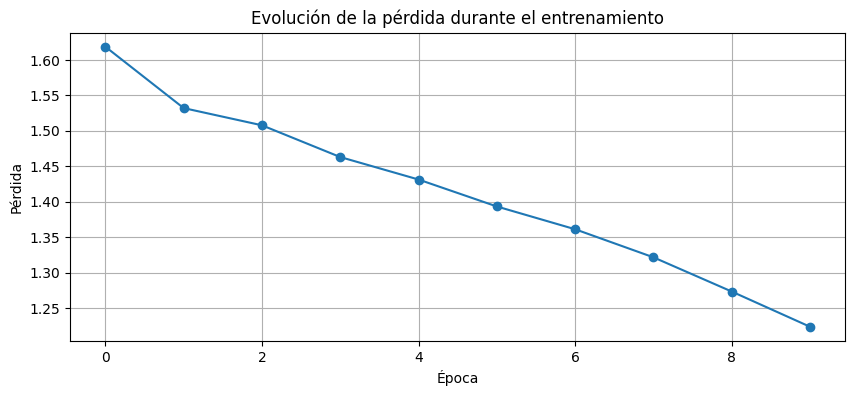

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(trainer.loss_history, marker='o')
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.grid(True)
plt.show()


In [14]:
!mkdir -p results/checkpoints


In [15]:
torch.save(model.state_dict(), "results/checkpoints/dt_model.pth")
